In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
print(pd.__version__)

%matplotlib inline

0.24.2


In [48]:
#df = pd.read_excel('Portfolio Return Example.xlsx', parse_dates=True, index_col=0)
df = pd.read_excel('Portfolio Return Example.xlsx')
df = df.set_index('Date')
df.head()

,ETF1,ETF2,ETF3,Weights ETF1,Weights ETF2,Weights ETF3,Return ETF1,Return ETF2,Return ETF 3,Portfolio Return,1+r,Cumulative Return
Date,,,,,,,,,,,,
2003-01-02,91.30,88.54,91.07,0.2,0.25,0.65,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-03,91.39,90.50,91.35,0.2,0.25,0.65,0.000986,0.022137,0.003075,0.007730,1.007730,0.007730
2003-01-06,93.49,91.18,92.96,0.2,0.25,0.65,0.022978,0.007514,0.017625,0.017930,1.017930,0.025799
2003-01-07,93.37,92.20,92.73,0.2,0.25,0.65,-0.001284,0.011187,-0.002474,0.000932,1.000932,0.026754
2003-01-08,92.40,91.05,91.39,0.2,0.25,0.65,-0.010389,-0.012473,-0.014451,-0.014589,0.985411,0.011775


In [49]:
def plot_returns(col, start_dates, end_dates, xlabels):
    etf_returns, portfolio_returns = [], []

    for start_date, end_date in zip(start_dates, end_dates):
        dt_rng = pd.date_range(start=start_date, end=end_date, freq='B')
        sub_df = copy.deepcopy(df[df.index.isin(dt_rng)])
        etf_returns.append((sub_df[sub_df.index.isin(dt_rng)][col].pct_change().fillna(0).add(1).cumprod()-1)[-1]*100)
        
        #sub_df['ETF1_Returns'] = sub_df['ETF1'].pct_change().fillna(0)
        #sub_df['ETF2_Returns'] = sub_df['ETF2'].pct_change().fillna(0)
        #sub_df['ETF3_Returns'] = sub_df['ETF3'].pct_change().fillna(0)
        #sub_df['Port_return'] = sub_df['ETF1_Returns'] * sub_df['Weights ETF1'] + sub_df['ETF2_Returns'] * sub_df['Weights ETF2'] + sub_df['ETF3_Returns'] * sub_df['Weights ETF3'] + 1
        #portfolio_returns.append(((sub_df['Port_return'].cumprod()) -1).fillna(0)[-1])
        portfolio_returns.append((df[df.index.isin(dt_rng)]['1+r'].cumprod() - 1)[-1]*100)
    
    #print(etf_returns, portfolio_returns)
    with plt.style.context(('seaborn', 'ggplot')):
        plt.figure(figsize=(15,8))
        bar1_range, bar2_range = range(0, 3*len(etf_returns),3), range(1, 3*len(etf_returns),3)
        min_ret, max_ret = min(etf_returns+portfolio_returns), max(etf_returns+portfolio_returns)

        plt.bar(bar1_range, etf_returns, width=0.95, label='Cumulative Returns %s'%col, color='lawngreen', alpha=0.8)
        plt.bar(bar2_range, portfolio_returns, width=0.95, label='Cumulative Returns Portfolio', color='royalblue', alpha=0.8)
        plt.xticks([(i+j)/2 for i,j in zip(bar1_range, bar2_range)],xlabels)
        #plt.ylim(min_ret-0.5,max_ret+0.5)
        start = (min_ret//5-1)*5
        end = (max_ret//5+1) * 5
        dt_range = np.arange(start,0.1, 5).tolist() + np.arange(0, end,5).tolist()
        plt.yticks(dt_range, ['%.2f%%'%val for val in dt_range])

        for i, ret in zip(bar1_range, etf_returns):
            plt.text(i, ret+0.05 if ret > 0 else ret-0.99, '%.2f%%'%ret, horizontalalignment='center',verticalalignment='center', fontsize=12)

        for i, ret in zip(bar2_range, portfolio_returns):
            plt.text(i, ret+0.05 if ret > 0 else ret-0.99, '%.2f%%'%ret, horizontalalignment='center',verticalalignment='center', fontsize=12)

        plt.grid(axis='x')
        plt.legend(loc='best')
        plt.title('%s vs Portfolio Cumulative Returns Comparison'%col)
        
    plt.savefig('%s_portfolio.png'%col)

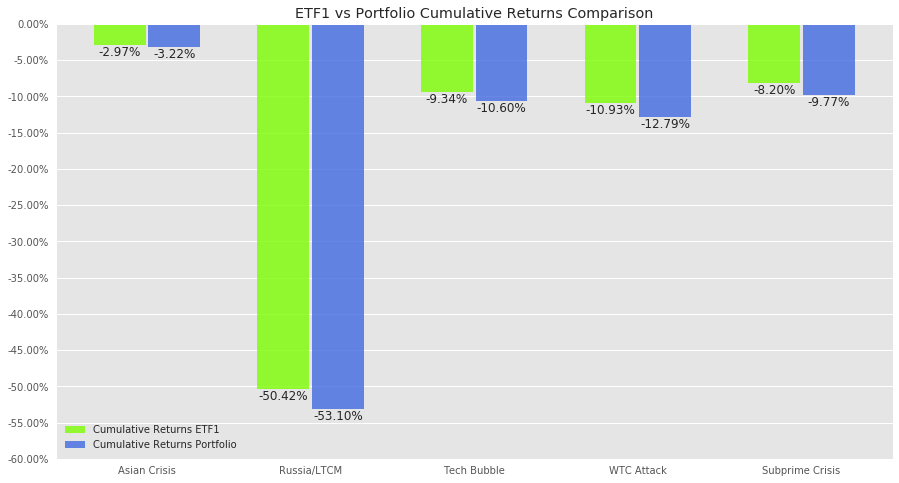

In [50]:
start_dates = ['1-2-2003', '10-31-2007', '5-20-2011', '7-31-2015', '1-26-2018']
end_dates = ['3-20-2003', '3-15-2009', '10-20-2011', '2-10-2016', '4-2-2018']
xlabels = ['Asian Crisis', 'Russia/LTCM', 'Tech Bubble', 'WTC Attack', 'Subprime Crisis']

plot_returns('ETF1',start_dates, end_dates, xlabels)

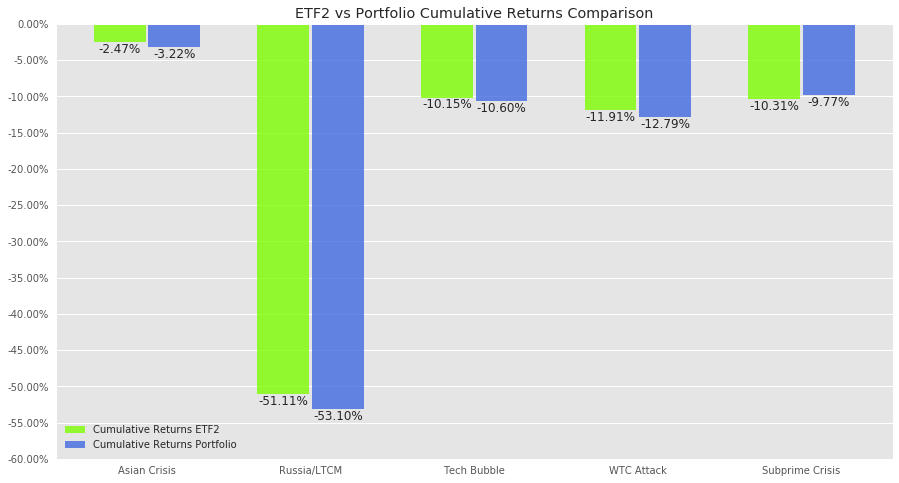

In [51]:
start_dates = ['1-2-2003', '10-31-2007', '5-20-2011', '7-31-2015', '1-26-2018']
end_dates = ['3-20-2003', '3-15-2009', '10-20-2011', '2-10-2016', '4-2-2018']
xlabels = ['Asian Crisis', 'Russia/LTCM', 'Tech Bubble', 'WTC Attack', 'Subprime Crisis']

plot_returns('ETF2',start_dates, end_dates, xlabels)

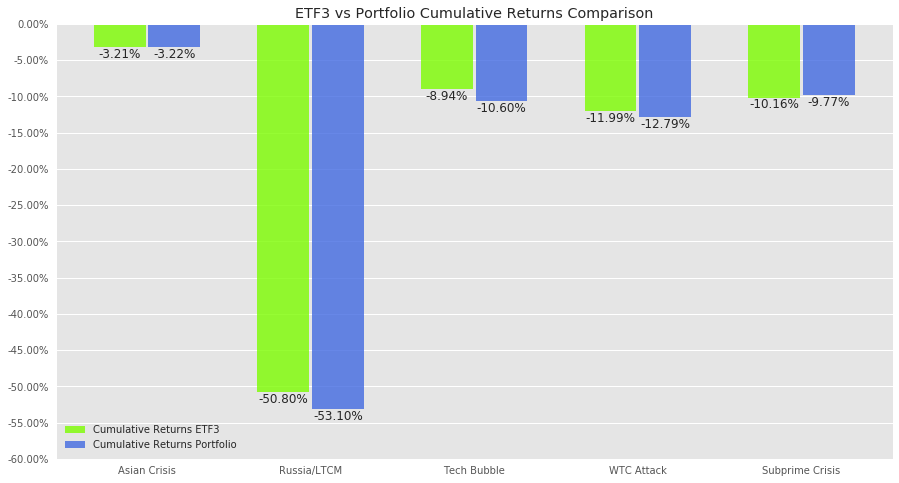

In [52]:
start_dates = ['1-2-2003', '10-31-2007', '5-20-2011', '7-31-2015', '1-26-2018']
end_dates = ['3-20-2003', '3-15-2009', '10-20-2011', '2-10-2016', '4-2-2018']
xlabels = ['Asian Crisis', 'Russia/LTCM', 'Tech Bubble', 'WTC Attack', 'Subprime Crisis']

plot_returns('ETF3',start_dates, end_dates, xlabels)

In [58]:
#https://stackoverflow.com/questions/36750571/calculate-max-draw-down-with-a-vectorized-solution-in-python
def max_dd(returns):
    """Assumes returns is a pandas Series"""
    r = returns.add(1).cumprod()
    dd = r.div(r.cummax()).sub(1)
    mdd = dd.min()
    end = dd.argmin()
    start = r.loc[:end].argmax()
    return mdd, start, end

def plot_dradowns(col, start_dates, end_dates, xlabels):
    max_drawdowns, max_dd_portfolio = [], []

    for start_date, end_date in zip(start_dates, end_dates):
        dt_rng = pd.date_range(start=start_date, end=end_date, freq='B')
        sub_df = copy.deepcopy(df[df.index.isin(dt_rng)])
        
        ## https://code-examples.net/en/q/230c4eb
        #sub_df['returns'] = df['ETF1'].pct_change().fillna(0)
        #sub_df['cumulative_return'] = sub_df.returns.add(1).cumprod().subtract(1)
        #sub_df['max_drawdown'] = sub_df.cumulative_return.add(1).div(sub_df.cumulative_return.cummax().add(1)).subtract(1)
        #max_drawdowns1.append(sub_df.max_drawdown.min())
        mdd, start,end = max_dd(sub_df[col].pct_change().fillna(0))
        sub_df['ETF1_Returns'] = sub_df['ETF1'].pct_change().fillna(0)
        sub_df['ETF2_Returns'] = sub_df['ETF2'].pct_change().fillna(0)
        sub_df['ETF3_Returns'] = sub_df['ETF3'].pct_change().fillna(0)
        sub_df['Port_Return'] = sub_df['ETF1_Returns'] * sub_df['Weights ETF1'] + sub_df['ETF2_Returns'] * sub_df['Weights ETF2'] + sub_df['ETF3_Returns'] * sub_df['Weights ETF3']
        mdd_p, start_p,end_p = max_dd(sub_df['Port_Return'])
        
        max_drawdowns.append(mdd*100)
        max_dd_portfolio.append(mdd_p*100)
    
    #print(max_drawdowns)
    #print(min(max_drawdowns))
    with plt.style.context(('seaborn', 'ggplot')):
        plt.figure(figsize=(15,8))
        bar1_range, bar2_range = range(0, 3*len(max_drawdowns),3), range(1, 3*len(max_drawdowns),3)
        min_d, max_d = min(max_drawdowns+max_dd_portfolio), max(max_drawdowns+max_dd_portfolio)
        
        plt.bar(bar1_range, max_drawdowns, width=0.95, label='Max Drawdowns %s'%col, color='lawngreen', alpha=0.8)
        plt.bar(bar2_range, max_dd_portfolio, width=0.95, label='Max Drawdowns Portfolio', color='royalblue', alpha=0.8)
        plt.xticks([(i+j)/2 for i,j in zip(bar1_range, bar2_range)],xlabels)
        start = (min_d//5-1)*5
        end = (max_d//5+1) * 5
        dt_range = np.arange(start,0.1, 5).tolist() + np.arange(0, end,5).tolist()
        plt.yticks(dt_range, ['%.2f%%'%val for val in dt_range])
        
        for i, dd in zip(bar1_range, max_drawdowns):
            plt.text(i, dd+0.05 if dd > 0 else dd-0.99, '%.2f%%'%dd, horizontalalignment='center',verticalalignment='center', fontsize=12)

        for i, dd in zip(bar2_range, max_dd_portfolio):
            plt.text(i, dd+0.05 if dd > 0 else dd-0.99, '%.2f%%'%dd, horizontalalignment='center',verticalalignment='center', fontsize=12)

        plt.grid(axis='x')
        plt.legend(loc='best')
        
    plt.savefig('%s_maxdd.png'%col)

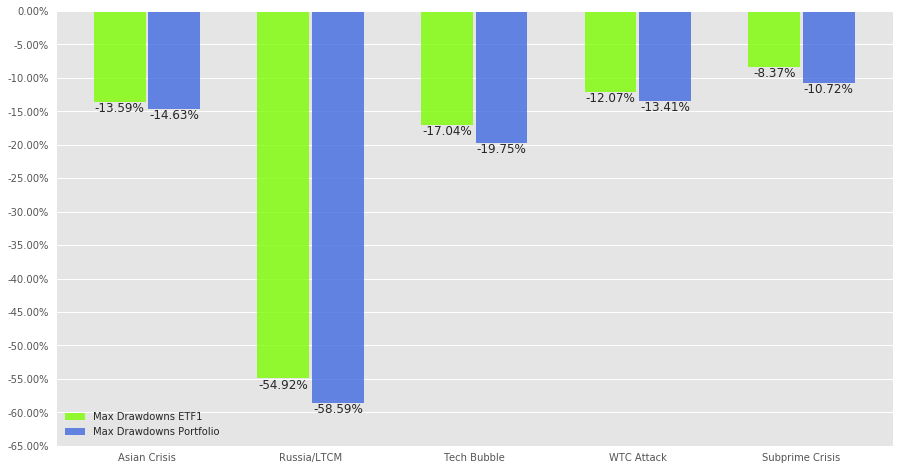

In [59]:
start_dates = ['1-2-2003', '10-31-2007', '5-20-2011', '7-31-2015', '1-26-2018']
end_dates = ['3-20-2003', '3-15-2009', '10-20-2011', '2-10-2016', '4-2-2018']
xlabels = ['Asian Crisis', 'Russia/LTCM', 'Tech Bubble', 'WTC Attack', 'Subprime Crisis']

plot_dradowns('ETF1', start_dates, end_dates, xlabels)

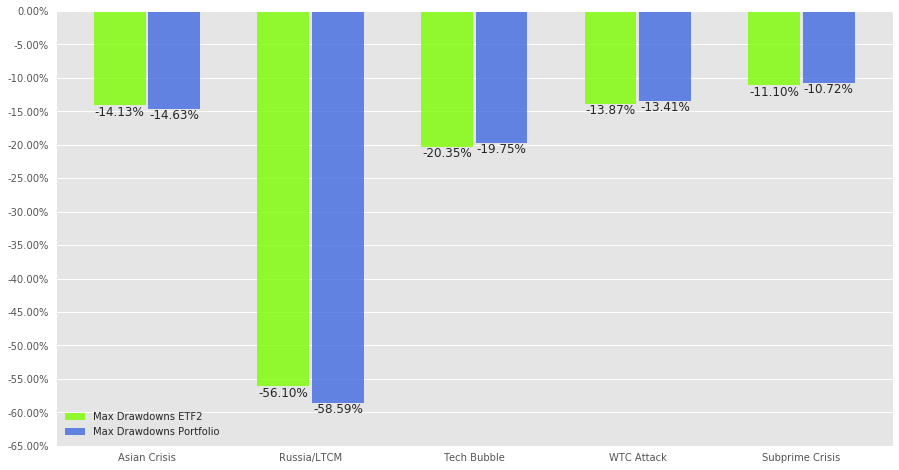

In [60]:
start_dates = ['1-2-2003', '10-31-2007', '5-20-2011', '7-31-2015', '1-26-2018']
end_dates = ['3-20-2003', '3-15-2009', '10-20-2011', '2-10-2016', '4-2-2018']
xlabels = ['Asian Crisis', 'Russia/LTCM', 'Tech Bubble', 'WTC Attack', 'Subprime Crisis']

plot_dradowns('ETF2', start_dates, end_dates, xlabels)

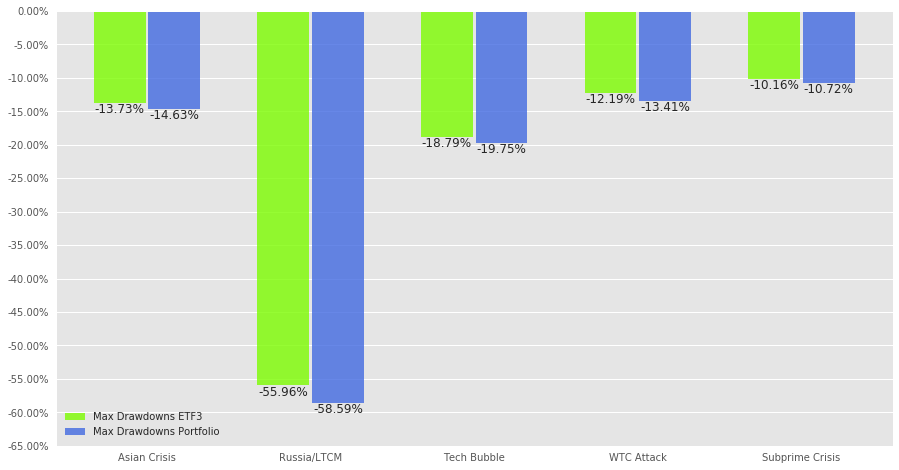

In [61]:
start_dates = ['1-2-2003', '10-31-2007', '5-20-2011', '7-31-2015', '1-26-2018']
end_dates = ['3-20-2003', '3-15-2009', '10-20-2011', '2-10-2016', '4-2-2018']
xlabels = ['Asian Crisis', 'Russia/LTCM', 'Tech Bubble', 'WTC Attack', 'Subprime Crisis']

plot_dradowns('ETF3', start_dates, end_dates, xlabels)

In [62]:
## https://code-examples.net/en/q/230c4eb
#df['max_drawdown'] = df['Cumulative Return'].add(1).div(df['Cumulative Return'].cummax().add(1)).subtract(1)

In [86]:
#def max_drawdown(vec):
    # https://discuss.pytorch.org/t/efficiently-computing-max-drawdown/6480
#    maximums = np.maximum.accumulate(vec)
#    drawdowns = 1 - vec / maximums
#    return np.max(drawdowns)